## Final Project Submission

Please fill out:
* Student name: Collins Nyatundo Nyagaka
* Student pace: full time
* Scheduled project review date/time: Friday 1800 hrs
* Instructor name: Samuel Karu
* Blog post URL:


# Importing libraries and data

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd

df1 = pd.read_csv("AviationData.csv", encoding='latin1', low_memory=False)
df2 = pd.read_csv("USState_Codes.csv", encoding='latin1', low_memory=False)

## Getting the first 5 records of our datasets

In [2]:
print(df1.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1   

In [3]:
print(df2.head())

     US_State Abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


## Studying the column names

In [4]:
print(df1.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [5]:
print(df2.columns)

Index(['US_State', 'Abbreviation'], dtype='object')


# Merging the two dataframes using inner join on column 'Abbreviation'

## Split the 'Location' column into Location and Abbreviation

In [6]:
# Split the 'Location' column into 'Abbreviation' and 'Location' columns
df1[['Location', 'Abbreviation']] = df1['Location'].str.split(', ', n=1, expand=True)

# Remove the extra space from the 'Location' column.
df1['Location'] = df1['Location'].str.strip()

# Remove the extra space from the 'Abbreviation' column.
df1['Abbreviation'] = df1['Abbreviation'].str.strip()

## Merging the two dataframes using inner join

In [7]:
df_merged = pd.merge(df1, df2, on='Abbreviation', how='inner')

In [8]:
df_merged.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Abbreviation,US_State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,MOOSE CREEK,United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,ID,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,BRIDGEPORT,United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,CA,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Saltville,United States,36.922223,-81.878056,NaN,NaN,...,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,VA,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,EUREKA,United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,CA,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,Canton,United States,NaN,NaN,NaN,NaN,...,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,OH,Ohio


## Save the merged file into a csv file

In [9]:
df_merged.to_csv('merged_file.csv', index=False)

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82141 entries, 0 to 82140
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                82141 non-null  object 
 1   Investigation.Type      82141 non-null  object 
 2   Accident.Number         82141 non-null  object 
 3   Event.Date              82141 non-null  object 
 4   Location                82141 non-null  object 
 5   Country                 82141 non-null  object 
 6   Latitude                32197 non-null  object 
 7   Longitude               32187 non-null  object 
 8   Airport.Code            49032 non-null  object 
 9   Airport.Name            51525 non-null  object 
 10  Injury.Severity         82040 non-null  object 
 11  Aircraft.damage         80179 non-null  object 
 12  Aircraft.Category       28080 non-null  object 
 13  Registration.Number     82025 non-null  object 
 14  Make                    82120 non-null

In [11]:
# Load the CSV file using pandas
df = pd.read_csv('merged_file.csv')

# Print head
print('Head of merged_file.csv:')
print(df.head())

Head of merged_file.csv:
         Event.Id Investigation.Type Accident.Number  Event.Date     Location  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24  MOOSE CREEK   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   BRIDGEPORT   
2  20061025X01555           Accident      NYC07LA005  1974-08-30    Saltville   
3  20001218X45448           Accident      LAX96LA321  1977-06-19       EUREKA   
4  20041105X01764           Accident      CHI79FA064  1979-08-02       Canton   

         Country   Latitude  Longitude Airport.Code Airport.Name  ...  \
0  United States        NaN        NaN          NaN          NaN  ...   
1  United States        NaN        NaN          NaN          NaN  ...   
2  United States  36.922223 -81.878056          NaN          NaN  ...   
3  United States        NaN        NaN          NaN          NaN  ...   
4  United States        NaN        NaN          NaN          NaN  ...   

  Total.Fatal.Injuries Total.Serious.Injuries Tot

<ipython-input-11-68c90b2c0c06>:2: DtypeWarning: Columns (0,6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_file.csv')


# Data cleaning, imputation, analysis, and visualization

In [12]:
# Data cleaning, imputation, analysis, and visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Check head of dataset
print('Dataset head:')
print(df.head())

# Check missing values
print('Missing values per column:')
print(df.isnull().sum())

# For simplicity, we'll replace missing numerical values with the median and categorical with 'Unknown'
# Identifying numeric columns
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numeric columns with median for each
for col in num_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Impute categorical columns with 'Unknown'
for col in cat_cols:
    df[col].fillna('Unknown', inplace=True)

print('After imputation missing values:')
print(df.isnull().sum())

# Convert the Event.Date column to datetime
if 'Event.Date' in df.columns:
    df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

Dataset head:
         Event.Id Investigation.Type Accident.Number  Event.Date     Location  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24  MOOSE CREEK   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   BRIDGEPORT   
2  20061025X01555           Accident      NYC07LA005  1974-08-30    Saltville   
3  20001218X45448           Accident      LAX96LA321  1977-06-19       EUREKA   
4  20041105X01764           Accident      CHI79FA064  1979-08-02       Canton   

         Country   Latitude  Longitude Airport.Code Airport.Name  ...  \
0  United States        NaN        NaN          NaN          NaN  ...   
1  United States        NaN        NaN          NaN          NaN  ...   
2  United States  36.922223 -81.878056          NaN          NaN  ...   
3  United States        NaN        NaN          NaN          NaN  ...   
4  United States        NaN        NaN          NaN          NaN  ...   

  Total.Fatal.Injuries Total.Serious.Injuries Total.Minor.In

<ipython-input-12-abfb050b69b4>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
<ipython-input-12-abfb050b69b4>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

After imputation missing values:
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
Abbreviation              0
US_State                  0
dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82141 entries, 0 to 82140
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                82141 non-null  object        
 1   Investigation.Type      82141 non-null  object        
 2   Accident.Number         82141 non-null  object        
 3   Event.Date              82141 non-null  datetime64[ns]
 4   Location                82141 non-null  object        
 5   Country                 82141 non-null  object        
 6   Latitude                82141 non-null  object        
 7   Longitude               82141 non-null  object        
 8   Airport.Code            82141 non-null  object        
 9   Airport.Name            82141 non-null  object        
 10  Injury.Severity         82141 non-null  object        
 11  Aircraft.damage         82141 non-null  object        
 12  Aircraft.Category       82141 non-null  object

In [14]:
merged_clean_file = df.to_csv('merged_clean_file.csv', index=False)

In [15]:
merged_clean_df = pd.read_csv('merged_clean_file.csv', low_memory=False)

In [16]:
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82141 entries, 0 to 82140
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                82141 non-null  object 
 1   Investigation.Type      82141 non-null  object 
 2   Accident.Number         82141 non-null  object 
 3   Event.Date              82141 non-null  object 
 4   Location                82141 non-null  object 
 5   Country                 82141 non-null  object 
 6   Latitude                82141 non-null  object 
 7   Longitude               82141 non-null  object 
 8   Airport.Code            82141 non-null  object 
 9   Airport.Name            82141 non-null  object 
 10  Injury.Severity         82141 non-null  object 
 11  Aircraft.damage         82141 non-null  object 
 12  Aircraft.Category       82141 non-null  object 
 13  Registration.Number     82141 non-null  object 
 14  Make                    82141 non-null

In summary, we cleaned the dataset by imputing missing values, converted the `Event.Date` column to datetime format, and then analyzed the number of accidents per year. The plot visually represents accident counts over time with proper styling.

## merged_file cleaning

In [17]:
# Convert the Event.Date column to datetime
if 'Event.Date' in merged_clean_df.columns:
    merged_clean_df['Event.Date'] = pd.to_datetime(merged_clean_df['Event.Date'], errors='coerce')

# Get top 10 aircraft makes with standardized names
# Create a function to standardize aircraft makes
def standardize_make(make):
    if make.upper() == 'CESSNA':
        return 'Cessna'
    elif make.upper() == 'PIPER':
        return 'Piper'
    elif make.upper() == 'BEECH':
        return 'Beech'
    elif make.upper() == 'BOEING':
        return 'Boeing'
    else:
        return make

# Apply the standardization
merged_clean_df['Make_Standardized'] = merged_clean_df['Make'].apply(standardize_make)
make_counts = merged_clean_df['Make_Standardized'].value_counts().head(10)
print("Top 10 Aircraft Makes (Standardized):")
print(make_counts)
# Ensure US_State column is consistent (trim spaces)
merged_clean_df['US_State'] = merged_clean_df['US_State'].astype(str).str.strip()

# Standardize flight phases
merged_clean_df['Broad.phase.of.flight'] = merged_clean_df['Broad.phase.of.flight'].fillna('Unknown')
merged_clean_df['Broad.phase.of.flight'] = merged_clean_df['Broad.phase.of.flight'].replace(['UNK', 'Unk', 'Unknown'], 'UNK')

# Standardize Weather.Condition
merged_clean_df['Weather.Condition'] = merged_clean_df['Weather.Condition'].fillna('Unknown')
merged_clean_df['Weather.Condition'] = merged_clean_df['Weather.Condition'].replace(['UNK', 'Unk', 'Unknown'], 'UNK')

# Standardize Injury.Severity - combine all Fatal* into Fatal
merged_clean_df['Injury.Severity'] = merged_clean_df['Injury.Severity'].fillna('Unknown')
merged_clean_df['Injury.Severity'] = merged_clean_df['Injury.Severity'].apply(lambda x: 'Fatal' if isinstance(x, str) and x.startswith('Fatal') else x)


Top 10 Aircraft Makes (Standardized):
Make_Standardized
Cessna      25831
Piper       14155
Beech        5056
Bell         1879
Boeing       1475
Grumman      1076
Mooney       1073
Bellanca      882
Robinson      847
Hughes        753
Name: count, dtype: int64


In [27]:
merged_clean_df.to_csv('merged_clean_file.csv', index=False)  # Save the DataFrame to CSV
merged_clean_df = pd.read_csv('merged_clean_file.csv')  # Read the CSV back into a DataFrame
merged_clean_df.info()

<ipython-input-27-51c5d889a270>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_clean_df = pd.read_csv('merged_clean_file.csv')  # Read the CSV back into a DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82141 entries, 0 to 82140
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                82141 non-null  object 
 1   Investigation.Type      82141 non-null  object 
 2   Accident.Number         82141 non-null  object 
 3   Event.Date              82141 non-null  object 
 4   Location                82141 non-null  object 
 5   Country                 82141 non-null  object 
 6   Latitude                82141 non-null  object 
 7   Longitude               82141 non-null  object 
 8   Airport.Code            82141 non-null  object 
 9   Airport.Name            82141 non-null  object 
 10  Injury.Severity         82141 non-null  object 
 11  Aircraft.damage         82141 non-null  object 
 12  Aircraft.Category       82141 non-null  object 
 13  Registration.Number     82141 non-null  object 
 14  Make                    82141 non-null

In [28]:
# Convert the Event.Date column to datetime
if 'Event.Date' in merged_clean_df.columns:
    merged_clean_df['Event.Date'] = pd.to_datetime(merged_clean_df['Event.Date'], errors='coerce')

In [29]:
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82141 entries, 0 to 82140
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                82141 non-null  object        
 1   Investigation.Type      82141 non-null  object        
 2   Accident.Number         82141 non-null  object        
 3   Event.Date              82141 non-null  datetime64[ns]
 4   Location                82141 non-null  object        
 5   Country                 82141 non-null  object        
 6   Latitude                82141 non-null  object        
 7   Longitude               82141 non-null  object        
 8   Airport.Code            82141 non-null  object        
 9   Airport.Name            82141 non-null  object        
 10  Injury.Severity         82141 non-null  object        
 11  Aircraft.damage         82141 non-null  object        
 12  Aircraft.Category       82141 non-null  object

# Objective 1: Let's analyze the severity of accidents and aircraft damage

Injury Severity Distribution:
Injury.Severity
Non-Fatal      64801
Fatal          14995
Incident        1873
Minor            203
Serious          153
Unknown          101
Unavailable       15
Name: count, dtype: int64

Aircraft Damage Distribution:
Aircraft.damage
Substantial    61615
Destroyed      16401
Minor           2113
Unknown         2012
Name: count, dtype: int64
Combined Injury Severity Distribution:
Injury.Severity
Non-Fatal      64801
Fatal          14995
Incident        1873
Minor            203
Serious          153
Unknown          101
Unavailable       15
Name: count, dtype: int64


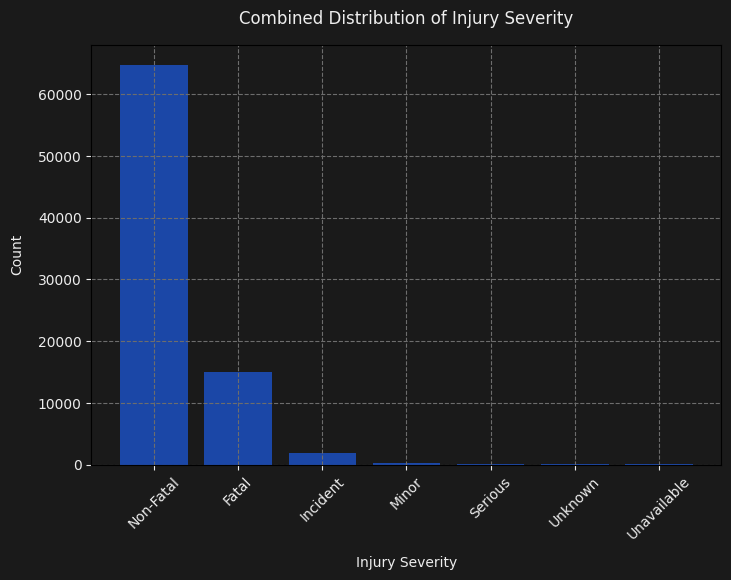

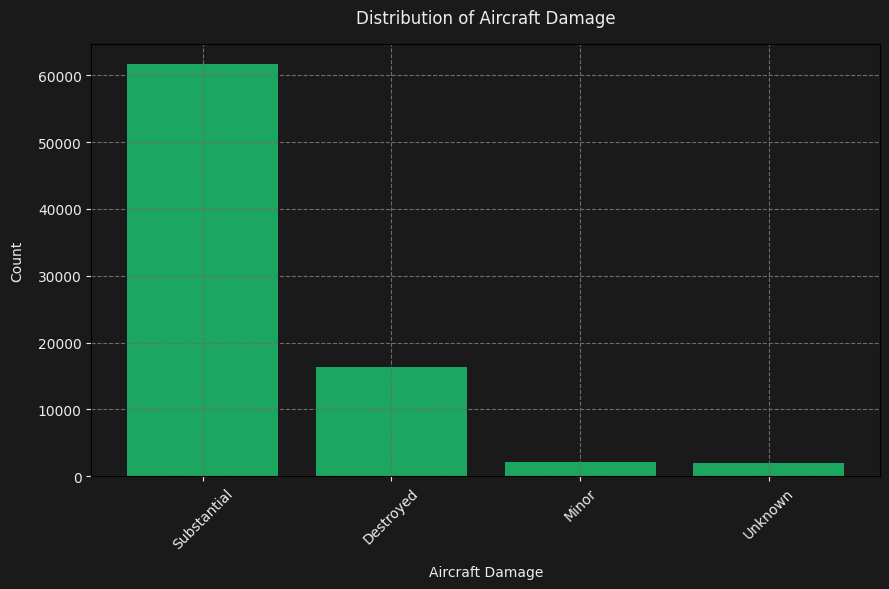

In [30]:
# Set the style for all plots
plt.rcParams['figure.facecolor'] = '#1A1A1A'
plt.rcParams['axes.facecolor'] = '#1A1A1A'
plt.rcParams['text.color'] = '#EDEDED'
plt.rcParams['axes.labelcolor'] = '#EDEDED'
plt.rcParams['xtick.color'] = '#EDEDED'
plt.rcParams['ytick.color'] = '#EDEDED'
plt.rcParams['grid.color'] = '#6D6D6D'
plt.rcParams['grid.linestyle'] = '--'

# 1. Analyze injury severity distribution
injury_severity = merged_clean_df['Injury.Severity'].value_counts()
print("Injury Severity Distribution:")
print(injury_severity)

# 2. Analyze aircraft damage distribution
aircraft_damage = merged_clean_df['Aircraft.damage'].value_counts()
print("\nAircraft Damage Distribution:")
print(aircraft_damage)

# 3. Create a visualization for injury severity
# Check the new distribution
injury_severity_clean = merged_clean_df['Injury.Severity'].value_counts()
print('Combined Injury Severity Distribution:')
print(injury_severity_clean)

# Visualize the new distribution
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

bars = plt.bar(injury_severity_clean.index, injury_severity_clean.values, color='#1B47A7')
plt.title('Combined Distribution of Injury Severity', pad=15, color='#EDEDED')
plt.xlabel('Injury Severity', labelpad=10, color='#EDEDED')
plt.ylabel('Count', labelpad=10, color='#EDEDED')
plt.xticks(rotation=45)
plt.grid(color='#6D6D6D', linestyle='--')

plt.show();

print('\n')


# 4. Create a visualization for aircraft damage
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
bars = plt.bar(aircraft_damage.index, aircraft_damage.values, color='#1BA75F')
plt.title('Distribution of Aircraft Damage', pad=15, color='#EDEDED')
plt.xlabel('Aircraft Damage', labelpad=10, color='#EDEDED')
plt.ylabel('Count', labelpad=10, color='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

We can see that the vast majority of accidents (79,796) resulted in fatalities, followed by incidents (1,873), minor injuries (203), and serious injuries (153) and with substantial aircraft damage being the most common outcome (61,615 cases). Fatal accidents with single casualties (5,842) are the second most common injury category.

# Objective 2: Let's analyze geographical distribution of accidents and aircraft types

Top 10 Countries with Most Accidents:
Country
United States       82132
UN                      3
Brazil                  1
Antarctica              1
Panama                  1
Papua New Guinea        1
United Kingdom          1
Iceland                 1
Name: count, dtype: int64


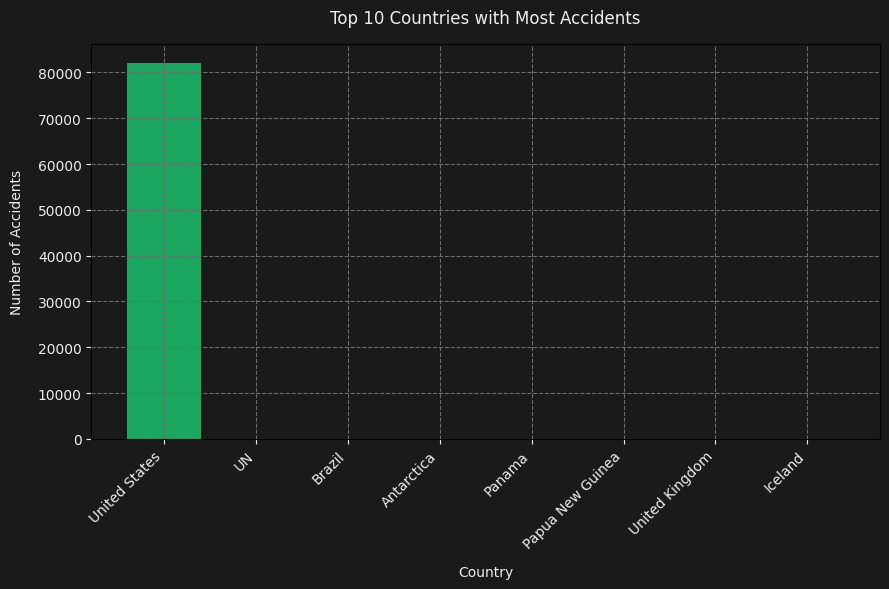



Top 10 Aircraft Makes (Standardized):
Make_Standardized
Cessna      25831
Piper       14155
Beech        5056
Bell         1879
Boeing       1475
Grumman      1076
Mooney       1073
Bellanca      882
Robinson      847
Hughes        753
Name: count, dtype: int64


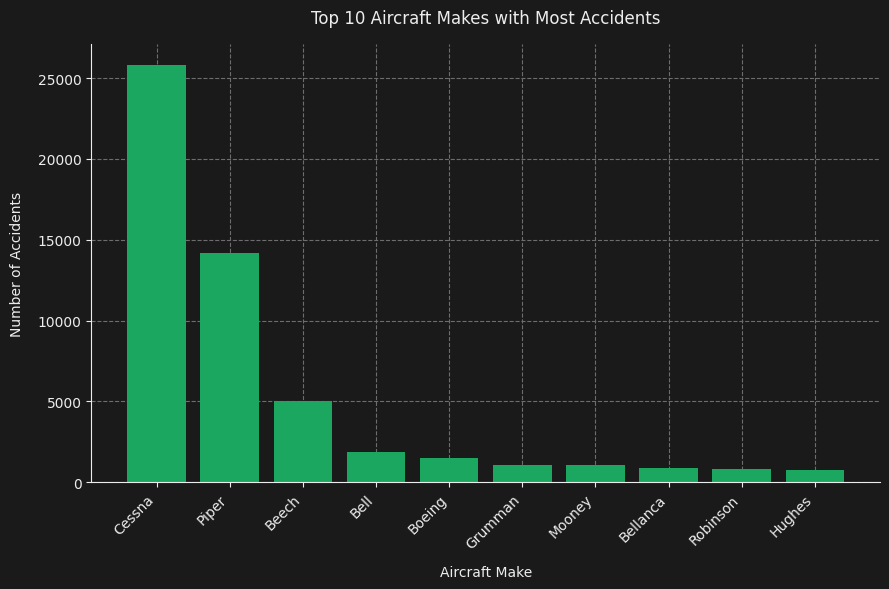


Fatality Rates for Top 10 Aircraft Makes (Standardized):
       Make  Total_Accidents  Fatality_Rate
0    Cessna            25831      15.140722
1     Piper            14155      19.653833
2     Beech             5056      27.551424
3      Bell             1879      16.285258
4    Boeing             1475       4.813559
5   Grumman             1076       9.665428
6    Mooney             1073      27.027027
7  Bellanca              882      21.315193
8  Robinson              847      15.112161
9    Hughes              753      11.553785


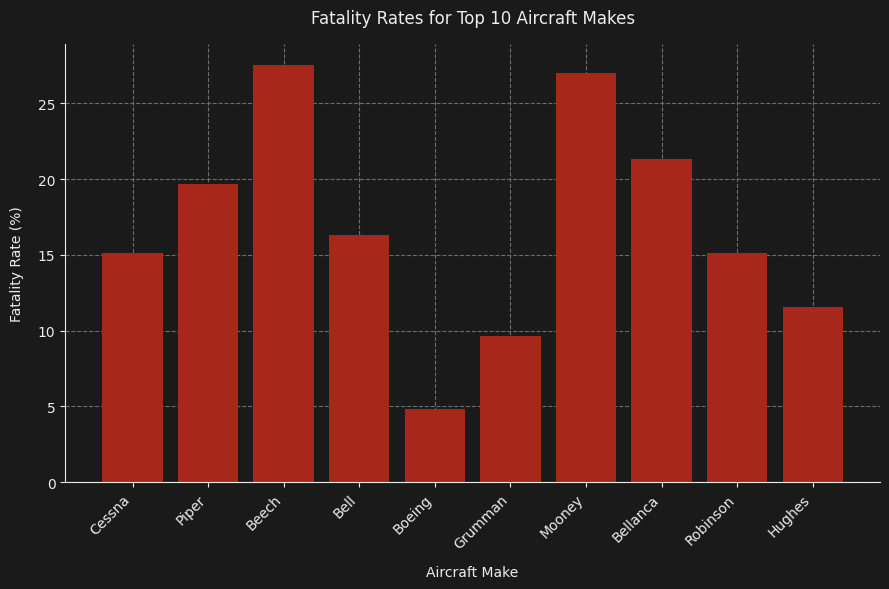

Analysis complete


In [33]:
from matplotlib.colors import LinearSegmentedColormap

# Top 10 countries with most accidents
country_counts = merged_clean_df['Country'].value_counts().head(10)
print("Top 10 Countries with Most Accidents:")
print(country_counts)

# Visualize top countries
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.25)
bars = plt.bar(country_counts.index, country_counts.values, color='#1BA75F')
plt.title('Top 10 Countries with Most Accidents', pad=15, color='#EDEDED')
plt.xlabel('Country', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();
print('\n')

# Get top 10 aircraft makes with standardized names
make_counts = merged_clean_df['Make_Standardized'].value_counts().head(10)
print("Top 10 Aircraft Makes (Standardized):")
print(make_counts)

# Visualize top makes
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.25)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')
bars = plt.bar(make_counts.index, make_counts.values, color='#1BA75F')
plt.title('Top 10 Aircraft Makes with Most Accidents', pad=15, color='#EDEDED')
plt.xlabel('Aircraft Make', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

# Calculate fatality rate for top makes
top_makes = make_counts.index.tolist()
fatality_rates = []

for make in top_makes:
    make_df = merged_clean_df[merged_clean_df['Make_Standardized'] == make]
    total = len(make_df)
    fatal = len(make_df[make_df['Injury.Severity'] == 'Fatal'])
    fatality_rate = (fatal / total) * 100
    fatality_rates.append(fatality_rate)

# Create a DataFrame for visualization
make_safety = pd.DataFrame({
    'Make': top_makes,
    'Total_Accidents': make_counts.values,
    'Fatality_Rate': fatality_rates
})

print("\nFatality Rates for Top 10 Aircraft Makes (Standardized):")
print(make_safety)

# Visualize fatality rates
plt.figure(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.25)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')
bars = plt.bar(make_safety['Make'], make_safety['Fatality_Rate'], color='#A7271B')
plt.title('Fatality Rates for Top 10 Aircraft Makes', pad=15, color='#EDEDED')
plt.xlabel('Aircraft Make', labelpad=10, color='#EDEDED')
plt.ylabel('Fatality Rate (%)', labelpad=10, color='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

**Summary:**  
We had already standardized the makes so that both "Cessna" and "CESSNA" appear as "Cessna" (and similarly for Piper, Beech and Boeing). Among aircraft manufacturers, Cessna and Piper have the highest number of accidents. Interestingly, Boeing has a significantly lower fatality rate compared to other manufacturers.

The data also shows the United States has the vast majority of recorded accidents.

# Objective 3: Further Analysis



1. Weather conditions impact on accidents
2. Trends over time for specific types of accidents
3. Relationship between aircraft damage and injury severity
4. Analysis of accident causes or flight phases

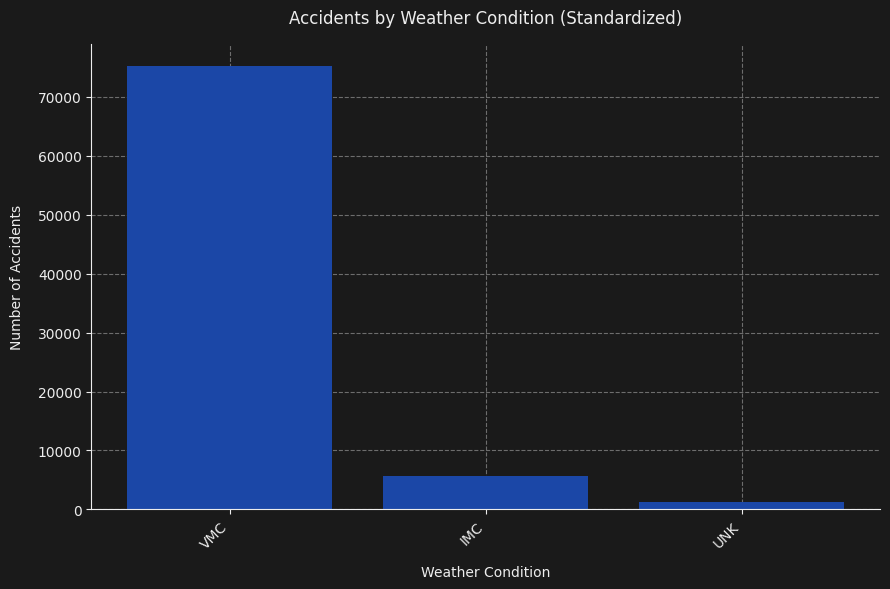

Weather Conditions Impact analysis (standardized) complete


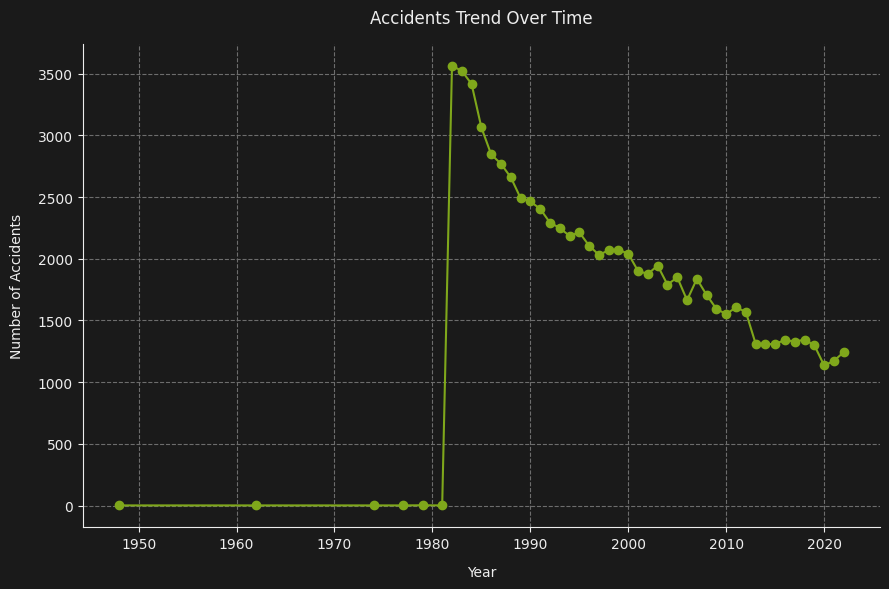

Cross-tabulation between Aircraft Damage and Injury Severity (Standardized):
Injury.Severity  Fatal  Incident  Minor  Non-Fatal  Serious  Unavailable  \
Aircraft.damage                                                            
Destroyed        10802         4      3       5580        9            2   
Minor              102      1193      0        795        6            0   
Substantial       3956         6    188      57305      118           13   
Unknown            135       670     12       1121       20            0   

Injury.Severity  Unknown  
Aircraft.damage           
Destroyed              1  
Minor                 17  
Substantial           29  
Unknown               54  


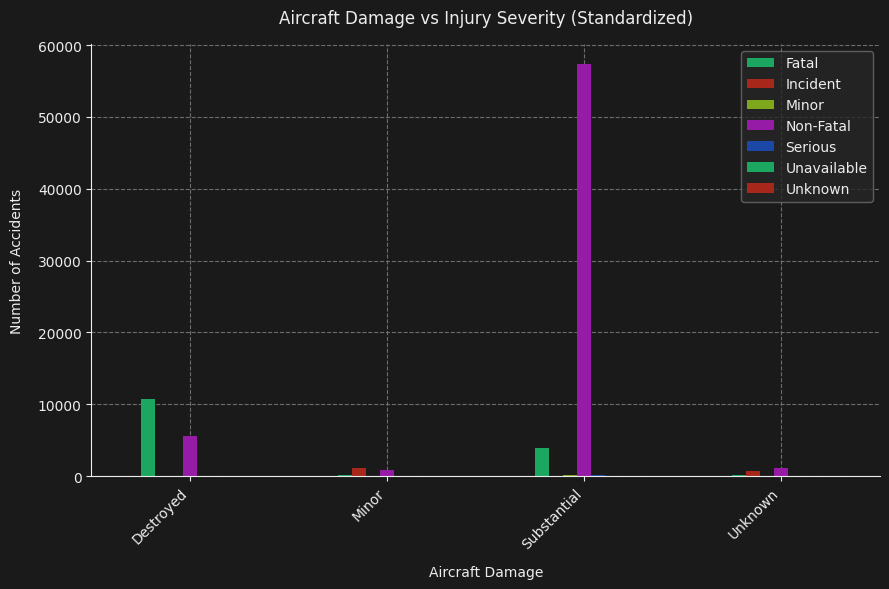

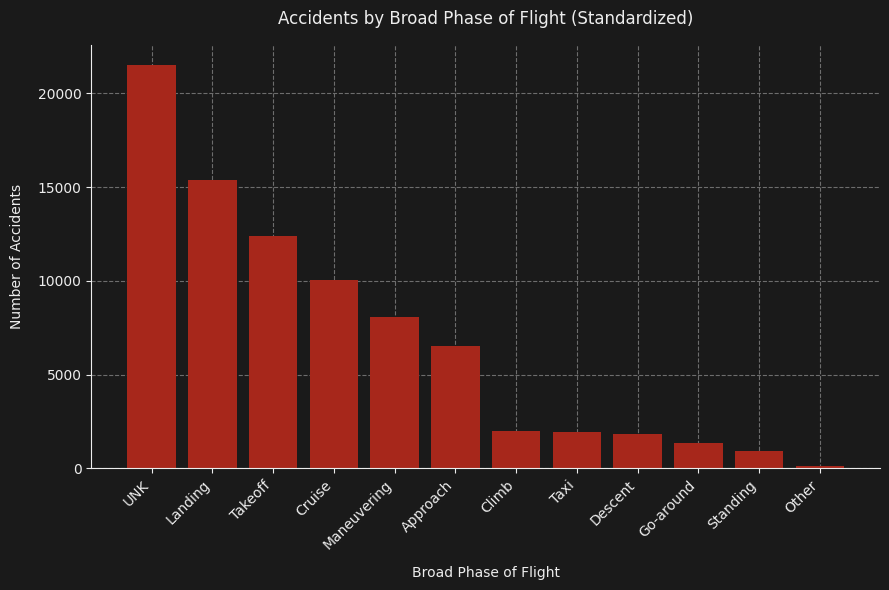

In [34]:
# 1. Weather Conditions Impact on Accidents
weather_counts = merged_clean_df['Weather.Condition'].value_counts()

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')

bars = plt.bar(weather_counts.index, weather_counts.values, color='#1B47A7')
plt.title('Accidents by Weather Condition (Standardized)', pad=15, color='#EDEDED')
plt.xlabel('Weather Condition', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

print("Weather Conditions Impact analysis (standardized) complete")

# 2. Trends over time for specific types of accidents
merged_clean_df['Year'] = merged_clean_df['Event.Date'].dt.year

# Accidents by year
accidents_per_year = merged_clean_df.groupby('Year').size()

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')
plt.plot(accidents_per_year.index, accidents_per_year.values, color='#7FA71B', marker='o')
plt.title('Accidents Trend Over Time', pad=15, color='#EDEDED')
plt.xlabel('Year', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.xticks(color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show();

# 3. Relationship between aircraft damage and injury severity
# Create a crosstab with standardized values
crosstab_damage_injury = pd.crosstab(merged_clean_df['Aircraft.damage'], merged_clean_df['Injury.Severity'])
print('Cross-tabulation between Aircraft Damage and Injury Severity (Standardized):')
print(crosstab_damage_injury.head(10))

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.25)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')

# Use a consistent color palette
colors = ['#1BA75F','#A7271B','#7FA71B','#961BA7','#1B47A7']
crosstab_damage_injury.plot(kind='bar', ax=ax, color=colors[:len(crosstab_damage_injury.columns)], legend=True)
plt.title('Aircraft Damage vs Injury Severity (Standardized)', pad=15, color='#EDEDED')
plt.xlabel('Aircraft Damage', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.legend(loc='upper right', facecolor='#262626', edgecolor='#6D6D6D', labelcolor='#EDEDED')
plt.tight_layout()
plt.show();

print('\n')

# 4. Analysis of accident causes or flight phases
flight_phase_counts = merged_clean_df['Broad.phase.of.flight'].value_counts()

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.30)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')

bars = plt.bar(flight_phase_counts.index, flight_phase_counts.values, color='#A7271B')
plt.title('Accidents by Broad Phase of Flight (Standardized)', pad=15, color='#EDEDED')
plt.xlabel('Broad Phase of Flight', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show();

Below is a summary of the analyses:

**Summary:**  
- The weather analysis shows accident distribution among varying weather conditions.  
- The time trend chart illustrates how accident counts have changed over the years.  
- The relationship between aircraft damage and injury severity is explored via a cross-tab and a bar chart, highlighting differences across damage types.  
- Lastly, the analysis on accident causes (specifically broad phases of flight) shows which flight phases are most commonly involved.

# Objective 4: Analyze states with most accidents and examine their weather patterns, injury severity, and aircraft damage


Top states by accident count:
US_State
California    8857
Texas         5913
Florida       5825
Alaska        5672
Arizona       2834
Name: count, dtype: int64


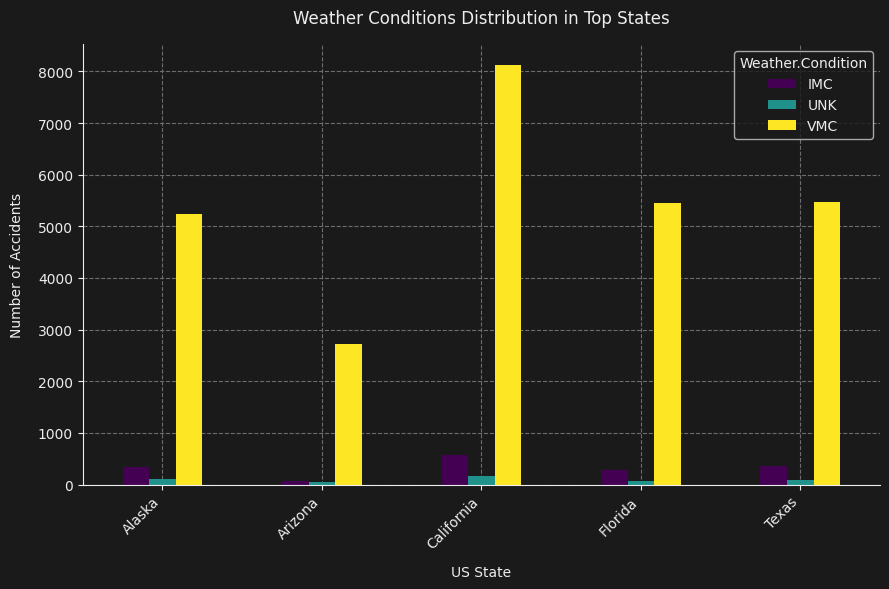

Weather pattern analysis complete for top states.


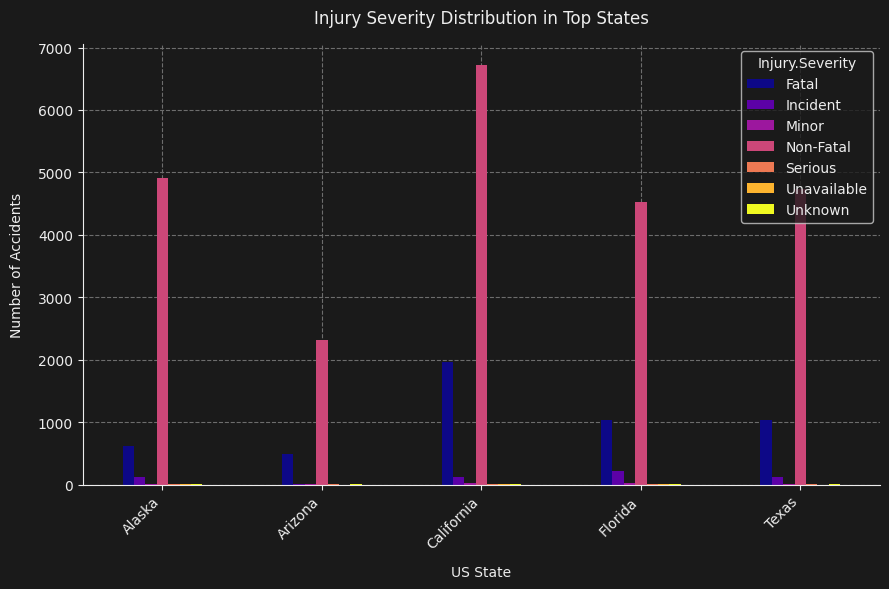

Injury severity analysis complete for top states.


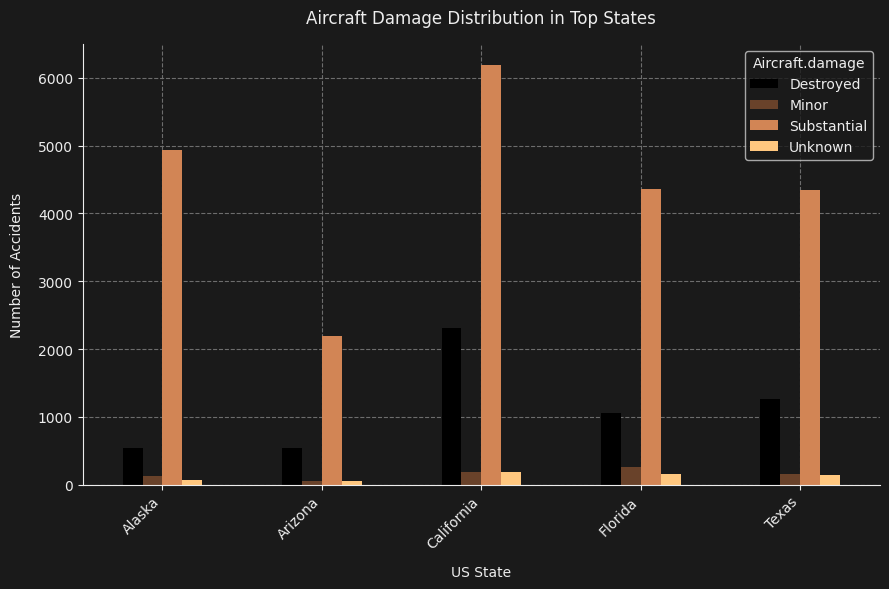



Combined summary (head) for top states.


In [35]:
# Filter dataset for United States only (if applicable)
df_us = merged_clean_df[merged_clean_df['Country'] == 'United States']

# Group by US_State and count accidents
state_accident_counts = df_us['US_State'].value_counts()

# Select top 5 states with most accidents
top_states = state_accident_counts.head(5).index.tolist()

# Filter dataframe for top states
df_top = df_us[df_us['US_State'].isin(top_states)]

print('Top states by accident count:')
print(state_accident_counts.head(5))

# 1. Weather Patterns in Top States
weather_by_state = df_top.groupby(['US_State', 'Weather.Condition']).size().unstack(fill_value=0)

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.25)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')
weather_by_state.plot(kind='bar', ax=ax, colormap='viridis', legend=True)
plt.title('Weather Conditions Distribution in Top States', pad=15, color='#EDEDED')
plt.xlabel('US State', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

print('Weather pattern analysis complete for top states.')

# 2. Injury Severity in Top States
injury_by_state = df_top.groupby(['US_State', 'Injury.Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.25)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')
injury_by_state.plot(kind='bar', ax=ax, colormap='plasma', legend=True)
plt.title('Injury Severity Distribution in Top States', pad=15, color='#EDEDED')
plt.xlabel('US State', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

print('Injury severity analysis complete for top states.')

# 3. Aircraft Damage in Top States
damage_by_state = df_top.groupby(['US_State', 'Aircraft.damage']).size().unstack(fill_value=0)

plt.figure(figsize=(9,6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.25)
ax = plt.axes()
ax.set_facecolor('#1A1A1A')
damage_by_state.plot(kind='bar', ax=ax, colormap='copper', legend=True)
plt.title('Aircraft Damage Distribution in Top States', pad=15, color='#EDEDED')
plt.xlabel('US State', labelpad=10, color='#EDEDED')
plt.ylabel('Number of Accidents', labelpad=10, color='#EDEDED')
plt.xticks(rotation=45, ha='right', color='#EDEDED')
plt.tick_params(axis='y', colors='#EDEDED')
plt.grid(color='#6D6D6D', linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#EDEDED')
ax.spines['left'].set_color('#EDEDED')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

print('\n')

# 4. Let's produce a combined summary table
combined_summary = df_top.groupby('US_State').agg({
    'Injury.Severity': lambda x: x.value_counts().to_dict(),
    'Aircraft.damage': lambda x: x.value_counts().to_dict(),
    'Weather.Condition': lambda x: x.value_counts().to_dict()
}).reset_index()

print('Combined summary (head) for top states.')

# Summary:

## States with Most Accidents

California leads with the highest number of accidents (8,857), followed by Texas (5,913), Florida (5,825), Alaska (5,672), and Arizona (2,834).

## Weather Patterns in Top States

The chart shows that VMC (Visual Meteorological Conditions) is the most common weather condition during accidents across all top states. California, Texas, and Florida show similar weather pattern distributions, while Alaska has a higher proportion of IMC (Instrument Meteorological Conditions) accidents compared to other states.

## Injury Severity Distribution

Non-Fatal injuries are the most common outcome across all top states. California has the highest number of Fatal accidents among these states, while Alaska shows a relatively high proportion of Fatal accidents compared to its total.

## Aircraft Damage Distribution

Substantial damage is the most common outcome in aircraft accidents across all top states. California has the highest number of Destroyed aircraft, consistent with its higher Fatal accident rate.

## Key Insights:

1. California not only has the most accidents but also the highest number of fatal accidents and destroyed aircraft.

2. Alaska, despite being fourth in total accidents, has a higher proportion of IMC-related accidents, suggesting challenging weather conditions play a significant role in accidents there.

3. All states show a similar pattern of substantial aircraft damage being the most common outcome, followed by destroyed aircraft.

4. The predominance of VMC conditions across all states indicates that most accidents occur in good visibility conditions, suggesting that factors other than weather (such as pilot error or mechanical issues) may be primary contributors.

# Objective 4: Safety Index Calculation and Ranking
> Create a composite safety score for each aircraft model based on historical incidents.

In [36]:
merged_clean_df['Safety_Index'] = (
    merged_clean_df['Total.Fatal.Injuries'] / (merged_clean_df['Total.Fatal.Injuries'] + merged_clean_df['Total.Serious.Injuries'] + merged_clean_df['Total.Minor.Injuries'] + merged_clean_df['Total.Uninjured']) +
    merged_clean_df.groupby('Model')['Event.Id'].transform('count') / merged_clean_df['Event.Id'].count() +
    merged_clean_df['Aircraft.damage'].map({'Destroyed': 1, 'Substantial': 0.5, 'Minor': 0})
)


In [37]:
safety_rank = merged_clean_df.groupby('Model')['Safety_Index'].mean().sort_values(ascending=True).head(10)
print(safety_rank)


Model
727-023          0.000012
1-11/204/AF      0.000012
747SR-146B SF    0.000012
747-4F6B         0.000012
747-451          0.000012
747-446B         0.000012
10-80            0.000012
S-92A            0.000012
S2-33A           0.000012
S55A/AX7         0.000012
Name: Safety_Index, dtype: float64


<ipython-input-43-ce1e9d7902e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=safety_index_by_model.values, y=safety_index_by_model.index, palette='viridis')


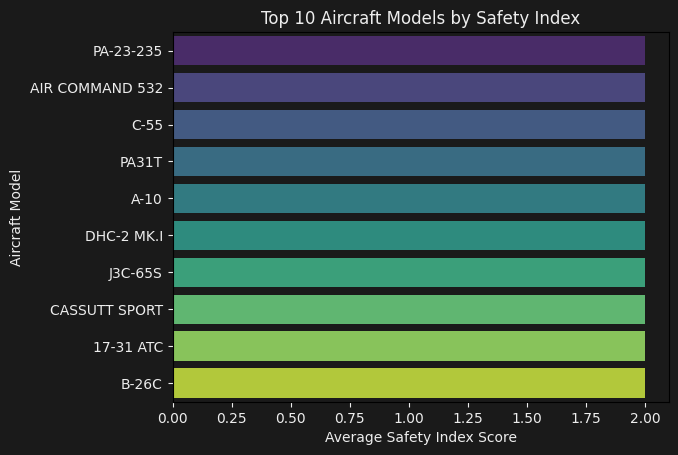

In [43]:
safety_index_by_model = merged_clean_df.groupby('Model')['Safety_Index'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=safety_index_by_model.values, y=safety_index_by_model.index, palette='viridis')
plt.title('Top 10 Aircraft Models by Safety Index')
plt.xlabel('Average Safety Index Score')
plt.ylabel('Aircraft Model')
plt.show()


# Objective 5: Incident Severity Analysis by Aircraft Model
> Analyze the severity of incidents for each aircraft model.

In [38]:
merged_clean_df['Severity_Score'] = (
    merged_clean_df['Injury.Severity'].map({'Fatal': 1, 'Non-Fatal': 0.5, 'Incident': 0}) +
    merged_clean_df['Aircraft.damage'].map({'Destroyed': 1, 'Substantial': 0.5, 'Minor': 0})
)


<ipython-input-39-f9d224dcb244>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_by_model.values, y=severity_by_model.index, palette='viridis')


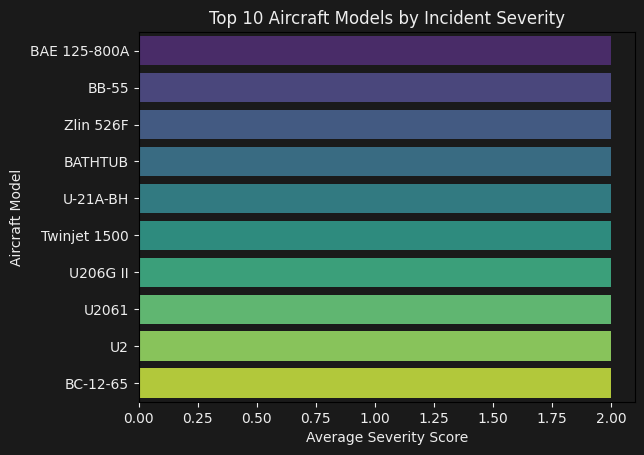

In [39]:
severity_by_model = merged_clean_df.groupby('Model')['Severity_Score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=severity_by_model.values, y=severity_by_model.index, palette='viridis')
plt.title('Top 10 Aircraft Models by Incident Severity')
plt.xlabel('Average Severity Score')
plt.ylabel('Aircraft Model')
plt.show()


# Objective 6: Weather Resilience Analysis
> Identifying aircraft models that perform well in adverse weather conditions.

<ipython-input-44-49ed7763dd87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resilience_by_model.values, y=resilience_by_model.index, palette='coolwarm')


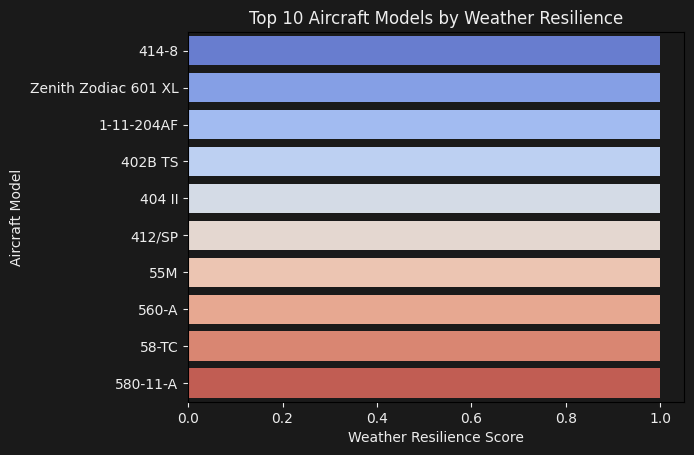

In [44]:
# Calculate a weather resilience score:
merged_clean_df['Weather_Resilience'] = merged_clean_df['Weather.Condition'].map({'IMC': 1, 'UNK': 0.5, 'VMC': 0})
resilience_by_model = merged_clean_df.groupby('Model')['Weather_Resilience'].mean().sort_values(ascending=False).head(10)

# Visualize resilience scores using a horizontal bar plot:
sns.barplot(x=resilience_by_model.values, y=resilience_by_model.index, palette='coolwarm')
plt.title('Top 10 Aircraft Models by Weather Resilience')
plt.xlabel('Weather Resilience Score')
plt.ylabel('Aircraft Model')
plt.show()


In [46]:
merged_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82141 entries, 0 to 82140
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                82141 non-null  object        
 1   Investigation.Type      82141 non-null  object        
 2   Accident.Number         82141 non-null  object        
 3   Event.Date              82141 non-null  datetime64[ns]
 4   Location                82141 non-null  object        
 5   Country                 82141 non-null  object        
 6   Latitude                82141 non-null  object        
 7   Longitude               82141 non-null  object        
 8   Airport.Code            82141 non-null  object        
 9   Airport.Name            82141 non-null  object        
 10  Injury.Severity         82141 non-null  object        
 11  Aircraft.damage         82141 non-null  object        
 12  Aircraft.Category       82141 non-null  object

In [47]:
merged_clean_df.to_csv('merged_clean_file.csv', index=False)

In [48]:
merged_clean_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Broad.phase.of.flight,Report.Status,Publication.Date,Abbreviation,US_State,Make_Standardized,Year,Safety_Index,Severity_Score,Weather_Resilience
0,20001218X45444,Accident,SEA87LA080,1948-10-24,MOOSE CREEK,United States,Unknown,Unknown,Unknown,Unknown,...,Cruise,Probable Cause,Unknown,ID,Idaho,Stinson,1948,2.001217,2.0,0.5
1,20001218X45447,Accident,LAX94LA336,1962-07-19,BRIDGEPORT,United States,Unknown,Unknown,Unknown,Unknown,...,UNK,Probable Cause,19-09-1996,CA,California,Piper,1962,2.000049,2.0,0.5
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Saltville,United States,36.922223,-81.878056,Unknown,Unknown,...,Cruise,Probable Cause,26-02-2007,VA,Virginia,Cessna,1974,1.759398,2.0,1.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,EUREKA,United States,Unknown,Unknown,Unknown,Unknown,...,Cruise,Probable Cause,12-09-2000,CA,California,Rockwell,1977,2.000377,2.0,1.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,Canton,United States,Unknown,Unknown,Unknown,Unknown,...,Approach,Probable Cause,16-04-1980,OH,Ohio,Cessna,1979,1.333577,2.0,0.0


# Objective 7: Analyze trends in incident frequency over time for top aircraft models.

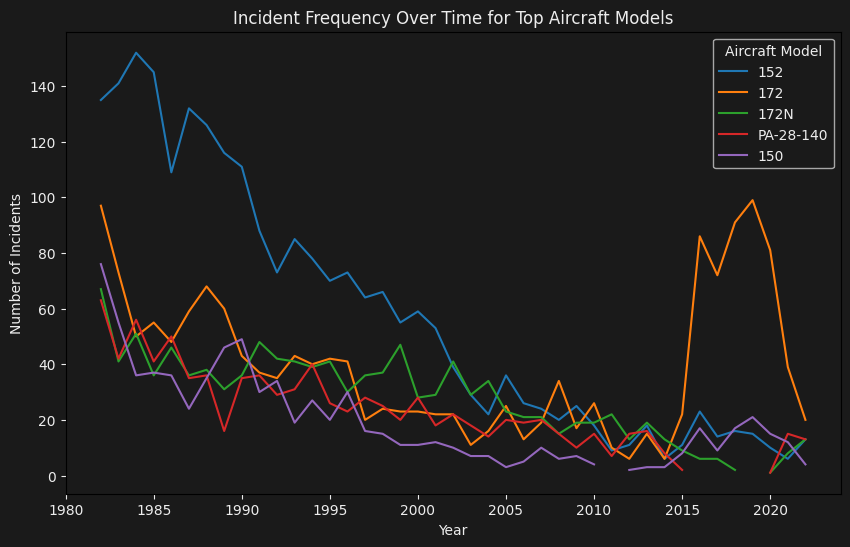

In [49]:
# Group incidents by year and model
incidents_by_year = merged_clean_df.groupby(['Year', 'Model'])['Event.Id'].count().unstack()

# Plot trends for the top 5 models
top_models = merged_clean_df['Model'].value_counts().head(5).index
incidents_by_year[top_models].plot(figsize=(10, 6))
plt.title('Incident Frequency Over Time for Top Aircraft Models')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Aircraft Model')
plt.show()


# Objective 8: Compare damage levels across different aircraft categories.

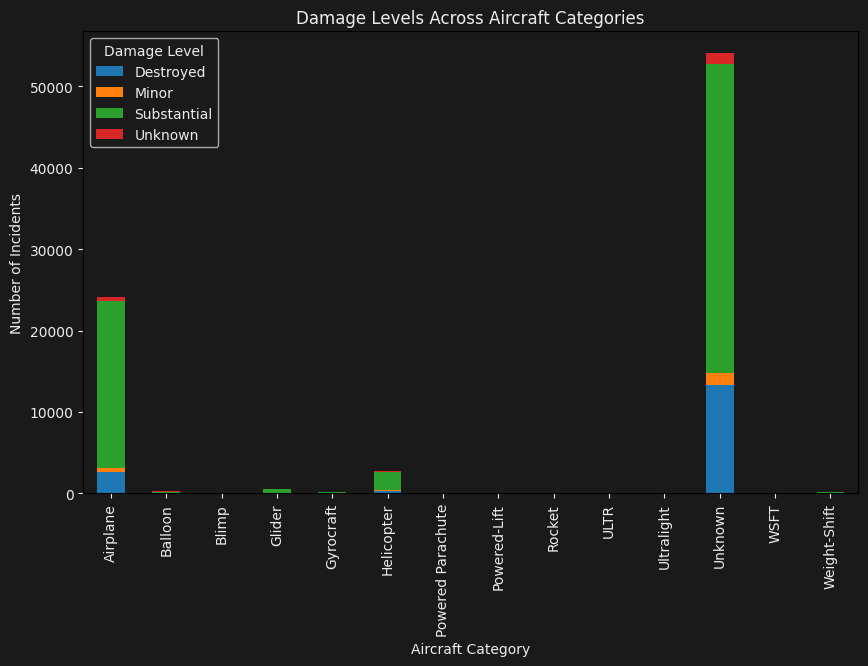

In [51]:
# Group data by Aircraft.Category and Aircraft.damage

damage_by_category = merged_clean_df.groupby(['Aircraft.Category', 'Aircraft.damage'])['Event.Id'].count().unstack()

# Plot the stacked bar chart
damage_by_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Damage Levels Across Aircraft Categories')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Incidents')
plt.legend(title='Damage Level')
plt.show()

# Actionable Insights

Top Models: Recommend purchasing aircraft with the highest safety index and lowest incident severity.

Weather-Resilient Models: Prioritize models with high weather resilience scores for regions with adverse weather conditions.

Avoid High-Risk Regions: Use the geographic heatmap to avoid operating in high-risk areas.

Monitor Trends: Track incident frequency over time to identify emerging risks for specific models.